<div style="background-color: salmon; color: black; padding: 10px; border-radius: 10px; text-align: center;">
    <h1>EDA for Car Price Prediction - Anjali Ramesh</h1>
</div>

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Introduction About the Data</h3>
</div>

The dataset is obtained from [Kaggle](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge).

#### **Objective** - Predict the `Price` of a car (Regression Analysis)

**Independent Features** - The original dataset has 17 independent features (including the `ID` column)

`ID`: Unique identifier for each car entry (integer)

`Levy`: Tax or fee applied to the car (object) 

`Manufacturer`: The manufacturer or brand of the car (object) 

`Model`: The model name of the car (object) 

`Prod. year`: The production year of the car (integer) 

`Category`: The category or type of the car (object) 

`Leather interior`: Indicates whether the car has a leather interior or not (object) 

`Fuel type`: The type of fuel used by the car (object) 

`Engine volume`: The engine displacement or volume of the car (object) 

`Mileage`: The distance traveled by the car (object) 

`Cylinders`: The number of cylinders in the car's engine (float) 

`Gear box type`: The type of gearbox used in the car (object) 

`Drive wheels`: The type of drive wheels (object) 

`Doors`: The number of doors in the car (object) 

`Wheel`: The type of wheel (object) 

`Color`: The color of the car (object) 

`Airbags`: The number of airbags in the car (integer) 


**The target feature**

`Price` : The target variable representing the price of the car (integer)

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Importing The Required Modules</h3>
</div>

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Data Reading and Info</h3>
</div>

In [364]:
df = pd.read_csv("data/car-price.csv", header=0)

In [365]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Data Cleaning</h3>
</div>

This data requires some cleaning before we start exploring. From just looking at the sample and information, these are the immediate action items. More shall be applied while we explore the data

- `Levy` : This should be a numerical column since it is tax applied to the car (in dollars)
- `Mileage` : Also numerical. Remove the km that appears after the value
- `Doors` : Ordinal column. The values must be 2-3, 4-5, >5 (this is from Kaggle discussion page about the column)

In [367]:
mapping = {
    '04-May': '4-5',
    '02-Mar': '2-3',
    '>5': '>5'
}

df['Doors'] = df['Doors'].replace(mapping)

df['Mileage'] = df['Mileage'].apply(lambda x: float(x.split()[0]))

df['Levy'] = df['Levy'].replace('-', np.nan)
df['Levy'] = df['Levy'].str.replace('[^\d.]', '', regex=True).astype(float)

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Checking for Missing Values</h3>
</div>

In [368]:
df.isna().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

`Levy` is the only column with missing values. We can deal with that by replacing with the mean values of the corresponding `Levy` fields based on the same manufacturer and model

In [369]:
df['Levy'] = df.groupby(['Manufacturer', 'Model'])['Levy'].transform(lambda x: x.fillna(x.mean()))

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Checking for Duplicated Rows and Dropping them</h3>
</div>

In [370]:
df.duplicated().sum()

313

In [371]:
df = df.drop_duplicates()

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Descriptive Statistics</h3>
</div>

In [372]:
# Removing the ID row as it does not provide any useful information
df = df.drop('ID', axis=1)

### Numerical and Categorical columns seperation

In [373]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags']
Categorical Columns : ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


### Numerical Columns Description

In [374]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,18924.0,1.858744e+04,1.921356e+05,1.0,5331.000000,13172.000000,22063.00,2.630750e+07
Levy,17401.0,9.640323e+02,6.423450e+02,87.0,643.179173,810.733333,1091.00,1.171400e+04
Prod. year,18924.0,2.010914e+03,5.665749e+00,1939.0,2009.000000,2012.000000,2015.00,2.020000e+03
Mileage,18924.0,1.555373e+06,4.880221e+07,0.0,70195.750000,126400.000000,189119.75,2.147484e+09
Cylinders,18924.0,4.580216e+00,1.200223e+00,1.0,4.000000,4.000000,4.00,1.600000e+01
Airbags,18924.0,6.568379e+00,4.322323e+00,0.0,4.000000,6.000000,12.00,1.600000e+01


### Categorical Columns Description

In [375]:
df[categorical_columns].describe().T

,count,unique,top,freq
Manufacturer,18924,65,HYUNDAI,3729
Model,18924,1590,Prius,1069
Category,18924,11,Sedan,8600
Leather interior,18924,2,Yes,13731
Fuel type,18924,7,Petrol,9944
Engine volume,18924,107,2,3856
Gear box type,18924,4,Automatic,13282
Drive wheels,18924,3,Front,12695
Doors,18924,3,4-5,18032
Wheel,18924,2,Left wheel,17471


<div style="background-color: lightpink; color: black; padding: 10px; border-radius: 10px; text-align: center;">
    <h2>Univariate Analysis & Feature Engineering</h2>
</div>

### Categorical Columns

In [376]:
categorical_columns

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

#### Manufacturer

Let us keep the top 10 manufacturers (>3% of records for each manufacturer) and rename the others as "others"

In [377]:
top_manufacturers = df['Manufacturer'].value_counts().nlargest(10).index
df['Manufacturer'] = df['Manufacturer'].apply(lambda x: x if x in top_manufacturers else 'Other')

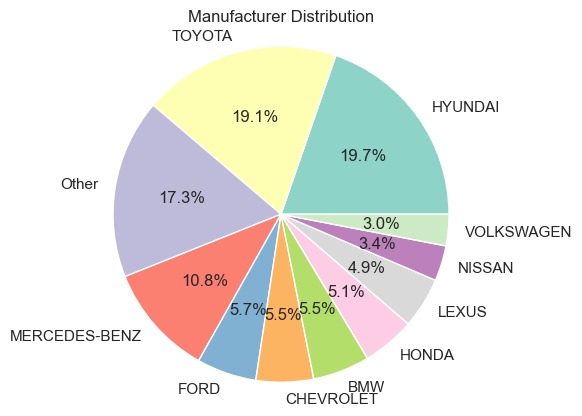

In [378]:
manufacturer_counts = df['Manufacturer'].value_counts()
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Manufacturer Distribution')
plt.show()

#### Model

In [379]:
# Calculate the counts for each model
model_counts = df['Model'].value_counts()
model_counts[:10]

Model
Prius       1069
Sonata      1067
Camry        929
Elantra      910
E 350        534
Santa FE     527
FIT          444
H1           435
Tucson       426
X5           351
Name: count, dtype: int64

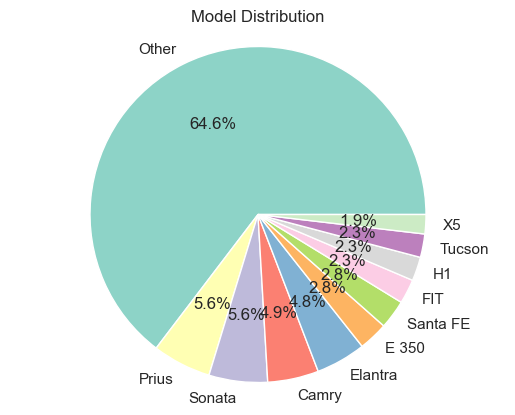

In [380]:
# Select the top 12 models and rename the rest as "Others"
top_models = model_counts.nlargest(10).index
df['Model'] = df['Model'].apply(lambda x: x if x in top_models else 'Other')

# Create a pie chart using matplotlib
plt.pie(df['Model'].value_counts(), labels=df['Model'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Model Distribution')
plt.show()

#### Category

In [381]:
# Calculate the counts for each category
category_counts = df['Category'].value_counts()
category_counts

Category
Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: count, dtype: int64

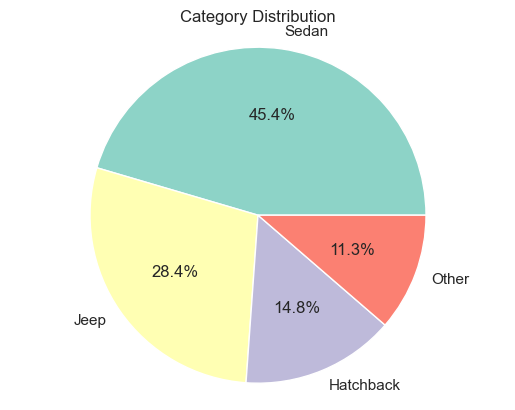

In [382]:
# Select the top 3 categories and rename the rest as "Others"
top_categories = category_counts.nlargest(3).index
df['Category'] = df['Category'].apply(lambda x: x if x in top_categories else 'Other')

# Create a pie chart using matplotlib
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Category Distribution')
plt.show()

#### Leather interior

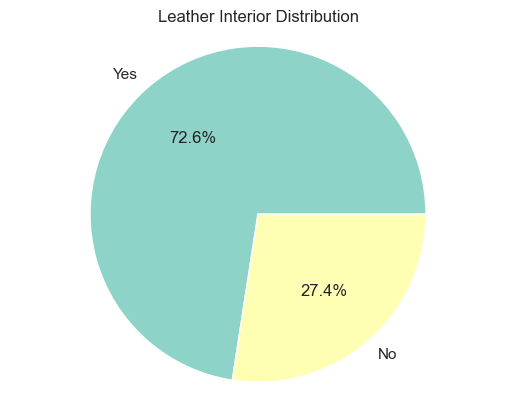

In [383]:
# Calculate the counts for each category
leather_counts = df['Leather interior'].value_counts()

# Create a pie chart using matplotlib
plt.pie(leather_counts, labels=leather_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Leather Interior Distribution')
plt.show()

Replacing 'Yes' and 'No' values in Leather interior to 1 and 0

In [384]:
df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})

#### Fuel type

In [385]:
top_fuel_types = df['Fuel type'].value_counts().nlargest(3).index
df.loc[~df['Fuel type'].isin(top_fuel_types), 'Fuel type'] = 'Other'

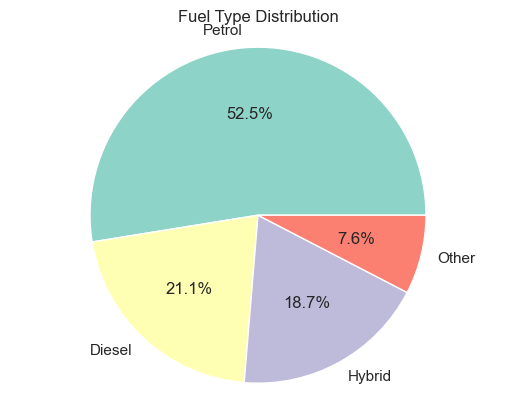

In [386]:
# Calculate the counts for each category
fuel_counts = df['Fuel type'].value_counts()

# Create a pie chart using matplotlib
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Fuel Type Distribution')
plt.show()

#### Engine volume

Lets convert this to a column called Turbo with 1s and 0 if Turbo or not

In [387]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [388]:
df['Turbo'] = df['Engine volume'].apply(lambda x: 1 if 'Turbo' in str(x) else 0)
df.drop('Engine volume', axis=1, inplace=True)

#### Gear box type

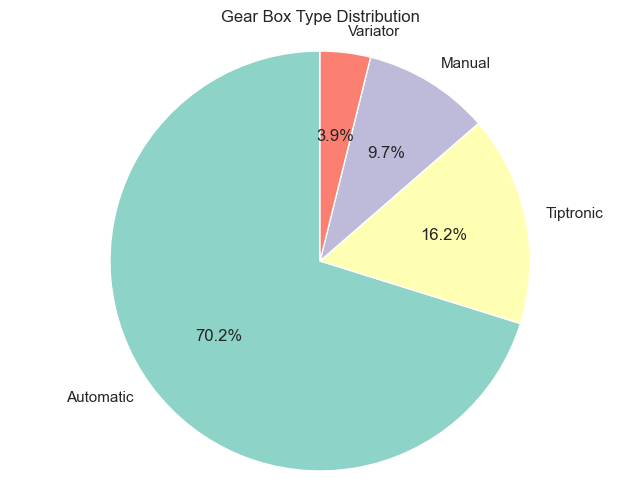

In [389]:
# Count the occurrences of each gear box type
gearbox_counts = df['Gear box type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.set_palette("Set3")
plt.title("Gear Box Type Distribution")
gearbox_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.ylabel('')
plt.show()

#### Drive wheels

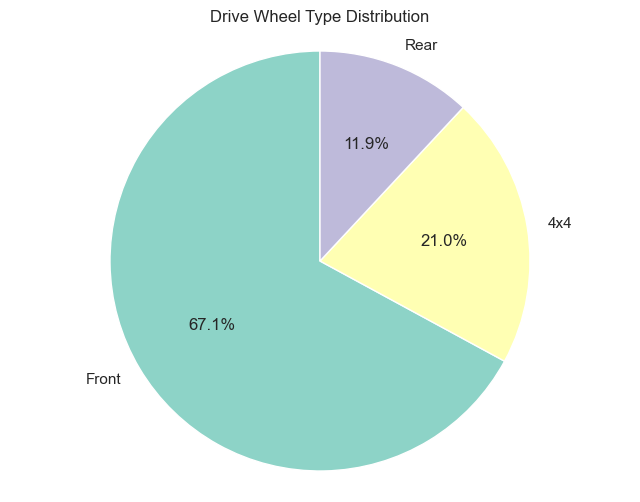

In [390]:
# Count the occurrences of each drive wheel type
drive_wheel_counts = df['Drive wheels'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.set_palette("Set3")
plt.title("Drive Wheel Type Distribution")
drive_wheel_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.ylabel('')
plt.show()

### Doors

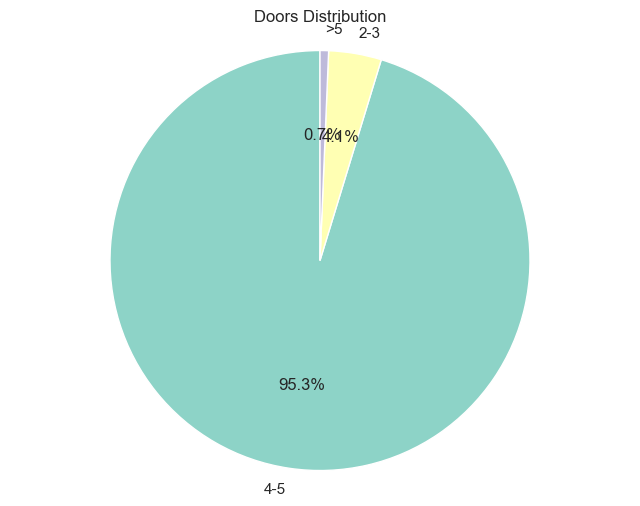

In [391]:
# Count the occurrences of each door count
doors_counts = df['Doors'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.set_palette("Set3")
plt.title("Doors Distribution")
doors_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.ylabel('')
plt.show()

#### Wheel

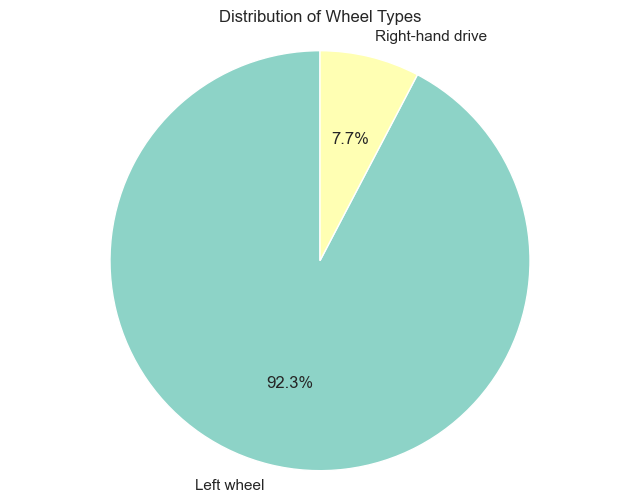

In [392]:
# Count the occurrences of each unique value in the "Wheel" column
wheel_counts = df['Wheel'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.title('Distribution of Wheel Types')
plt.pie(wheel_counts, labels=wheel_counts.index, autopct='%.1f%%', startangle=90)
plt.axis('equal')
plt.show()

#### Color

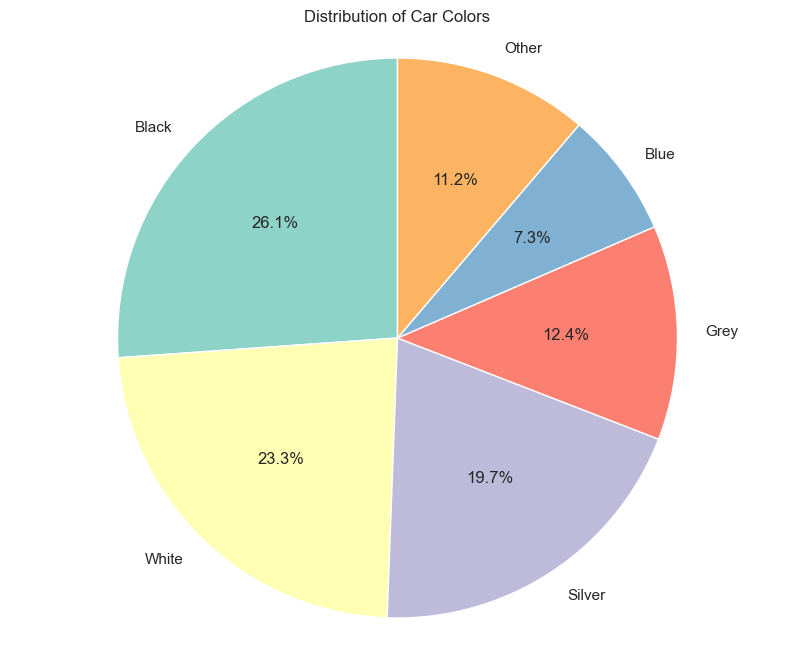

In [393]:
# Count the occurrences of each unique value in the "Color" column
color_counts = df['Color'].value_counts()

# Select the top 5 colors and rename others as "Other"
top_colors = color_counts.head(5)
top_colors['Other'] = color_counts[5:].sum()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.title('Distribution of Car Colors')
plt.pie(top_colors, labels=top_colors.index, autopct='%.1f%%', startangle=90)
plt.axis('equal')
plt.show()

### Numerical Columns

In [394]:
numerical_columns

['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags']

Removing outliers in the Price, Levy and Mileage columns

In [395]:
def remove_outliers(df, columns):
    for column in columns:
        # Convert negative values to zero
        df.loc[df[column] < 0, column] = 1
        
        # Calculate the IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers from the DataFrame
        df = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

In [396]:
# Define the columns for outlier removal
columns_to_remove_outliers = ['Price', 'Levy', 'Mileage']

# Call the function to remove outliers from the specified columns
df = remove_outliers(df, columns_to_remove_outliers)

In [399]:
df.describe()

,Price,Levy,Prod. year,Leather interior,Mileage,Cylinders,Airbags,Turbo
count,15044.000000,15044.000000,15044.000000,15044.000000,15044.000000,15044.000000,15044.000000,15044.000000
mean,14467.729660,858.147538,2011.568931,0.731986,128817.074182,4.428875,6.722015,0.084353
std,11608.788685,304.425429,4.586712,0.442940,77887.993829,1.016284,4.335874,0.277925
min,1.000000,87.000000,1973.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4704.000000,640.000000,2010.000000,0.000000,71200.750000,4.000000,4.000000,0.000000
50%,13172.000000,779.000000,2012.000000,1.000000,123000.000000,4.000000,6.000000,0.000000
75%,20698.000000,1053.000000,2014.000000,1.000000,177080.000000,4.000000,12.000000,0.000000
max,47120.000000,1750.000000,2020.000000,1.000000,355272.000000,16.000000,16.000000,1.000000


### Prod. Year

In the context of predicting car prices, considering years older than 30 years ago may not be as relevant or useful. Car prices are influenced by various factors, including market demand, depreciation, technological advancements, and changes in consumer preferences. The impact of these factors tends to be more significant in recent years.

Including very old car data may introduce noise and outliers that could negatively affect the accuracy of your price prediction model. Additionally, market dynamics and price trends may have significantly changed over the course of 30+ years, making it challenging to generalize the patterns and relationships between features and car prices.

Therefore, it is generally advisable to focus on more recent car data, typically within the past 10-15 years, to build a predictive model for car prices. This will help ensure that the model captures the most relevant and representative patterns in the data to make accurate price predictions.

Let us drop all the rows with years less than 1990.

In [87]:
df = df[df['Prod. year'] > 1990]

<Axes: xlabel='Prod. year', ylabel='Count'>

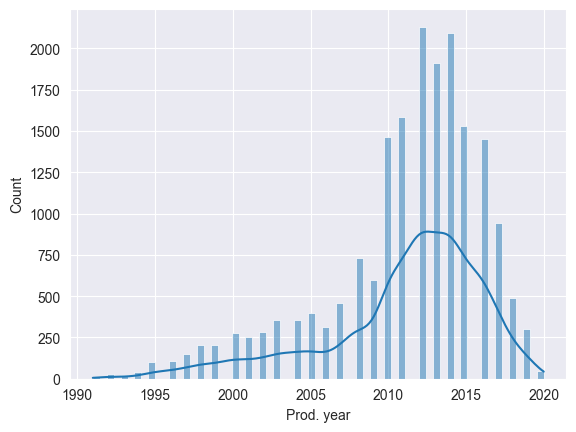

In [88]:
sns.histplot(data = df['Prod. year'], kde=True)

### Engine volume
- Small Cars and Hatchbacks: Engine volumes typically range from 0.8L to 1.6L.
- Compact and Mid-Size Sedans: Engine volumes typically range from 1.6L to 2.5L.
- Luxury and Performance Cars: Engine volumes can vary widely, but they often range from 2.0L to 4.0L or higher, depending on the specific model.
- SUVs and Crossovers: Engine volumes in this category usually start from 1.6L and can go up to 3.0L or more for larger SUVs.

We see the min and max value for Engine volume is 0 and 20. We need to handle such cases by replacing with the common engine volume values based on the manufacturer and model. 

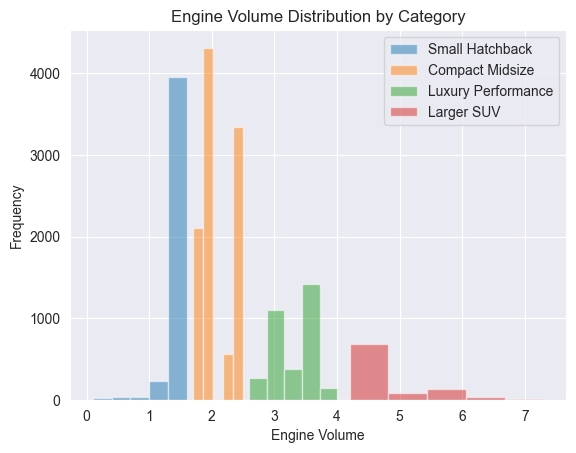

In [89]:
df['Engine volume'] = df.groupby(['Manufacturer', 'Model'])['Engine volume'].transform(lambda x: x.replace(0, x.mode().iloc[0]).replace(20, x.mode().iloc[0]))
# Define the custom bins for different categories
small_hatchback_bins = [0.8, 1.6]
compact_midsize_bins = [1.6, 2.5]
luxury_performance_bins = [2.0, 4.0]
larger_suv_bins = [4.0, 8.0]

# Create a new 'Category' column based on the engine volume ranges
df['car_cat'] = pd.cut(df['Engine volume'], bins=[0, 1.6, 2.5, 4.0, 8.0], labels=['Small Hatchback', 'Compact Midsize', 'Luxury Performance', 'Larger SUV'])

# Plotting the histogram by category
df.groupby('car_cat')['Engine volume'].plot(kind='hist', bins=5, alpha=0.5, legend=True)

# Adding labels and title
plt.xlabel('Engine Volume')
plt.ylabel('Frequency')
plt.title('Engine Volume Distribution by Category')

# Displaying the plot
plt.show()

/Users/arames52/opt/anaconda3/envs/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


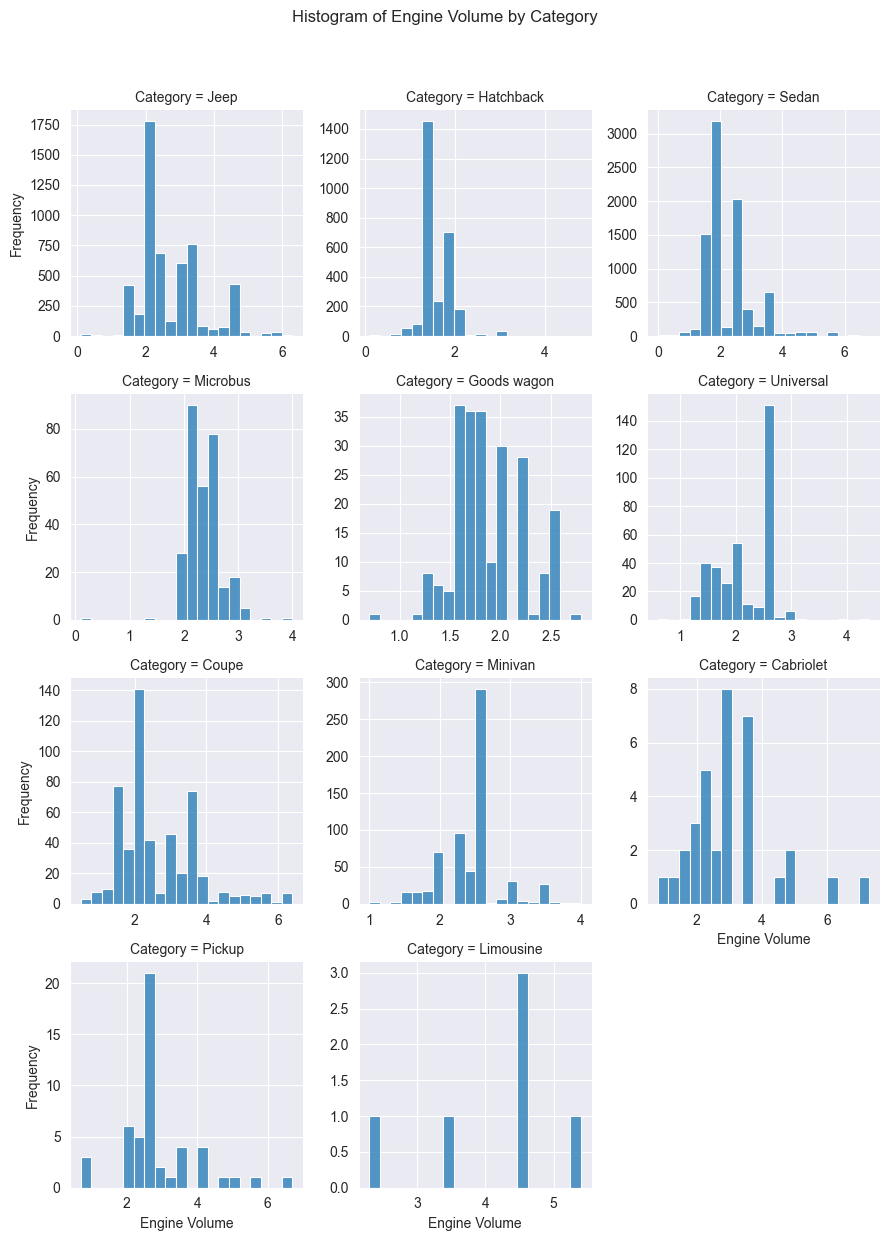

In [90]:
engine_volume = df['Engine volume']
category = df['Category']

# Set the style of the plot
sns.set_style('darkgrid')

# Create a FacetGrid for separate histograms for each category
g = sns.FacetGrid(data=df, col='Category', col_wrap=3, sharey=False, sharex=False)
g.map(sns.histplot, 'Engine volume', bins=20)

# Set labels and title
g.set_axis_labels('Engine Volume', 'Frequency')
g.fig.suptitle('Histogram of Engine Volume by Category', y=1.03)

# Adjust the spacing between subplots
g.tight_layout()

# Show the plot
plt.show()

Limousine, Pickup, Cabriolet have low number of records. We can drop any type of car that have less than 100 records

In [91]:
category_counts = df['Category'].value_counts()
valid_categories = category_counts[category_counts >= 100].index
df = df[df['Category'].isin(valid_categories)]

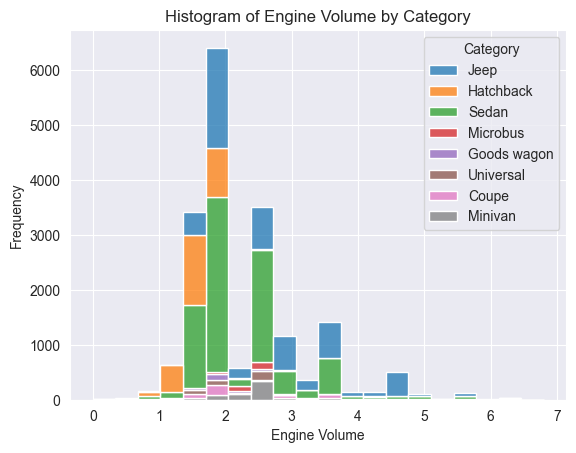

In [92]:
engine_volume = df['Engine volume']
category = df['Category']

# Set the style of the plot
sns.set_style('darkgrid')

# Create a histogram using seaborn
sns.histplot(data=df, x='Engine volume', hue='Category', bins=20, multiple='stack')

# Set labels and title
plt.xlabel('Engine Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Engine Volume by Category')

# Show the plot
plt.show()

### Mileage & Price

Remove outliers based on Z-Score

In [93]:
Q1_mileage = df['Mileage'].quantile(0.25)
Q3_mileage = df['Mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage

lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

In [94]:
mileage_outliers_mask = (df['Mileage'] < lower_bound_mileage) | (df['Mileage'] > upper_bound_mileage)
price_outliers_mask = (df['Price'] < lower_bound_price) | (df['Price'] > upper_bound_price)

In [95]:
df = df[~(mileage_outliers_mask | price_outliers_mask)]

In [100]:
df = df[~(df['Price']<500)]

In [ ]:
# Plotting the histogram of the 'Category' column
df['Category'].hist()

plt.xticks(rotation=90)
# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Category Histogram')

# Displaying the plot
plt.show()

### Manufacturer

For better learning of ML model, we shall keep only those manufacturers that have atleast 100 records of data. There are records of manufacturers with just one record. This may bias the ML model. For data integrity, we do this. 

In [ ]:
manufacturer_counts = df['Manufacturer'].value_counts()
manufacturers_to_remove = manufacturer_counts[manufacturer_counts < 100].index

df = df[~df['Manufacturer'].isin(manufacturers_to_remove)]

In [ ]:
# Plotting the manufacturer counts
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as per your preference
manufacturer_counts.plot(kind='bar', ax=ax)

# Adding labels and title
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.title('Manufacturer Counts')

# Rotating x-axis labels
# plt.xticks(rotation=45)  # Adjust the rotation angle as per your preference

# Displaying the plot
plt.tight_layout()  # To prevent overlapping of labels
plt.show()